In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# open the benign soomfy doorlock captures from the IOT devices
soomfy_doorlock = pd.read_pickle('Datasets/IOT23/Benign-Soomfy-Doorlock/zeek_normal.pkl')

In [3]:
soomfy_doorlock.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2019-07-03 13:16:59.172194958,0.0.0.0,68,255.255.255.255,67,udp,30.004642,S0,0,16,9216,0,0,benign,missing,0,0
1,2019-07-03 13:17:29.173340082,255.255.255.255,68,192.168.1.1,67,udp,0.004564,SHR,0,0,0,13,4264,benign,missing,0,1
2,2019-07-03 13:19:12.076414108,::,143,ff02::16,0,icmp,180.863984,OTH,0,14,1384,0,0,benign,missing,1,2
3,2019-07-03 13:19:12.145221949,0.0.0.0,68,255.255.255.255,67,udp,178.246691,S0,0,23,7544,0,0,benign,missing,0,0
4,2019-07-03 13:19:12.748409986,::,135,ff02::1:ffd5:cdf,136,icmp,134.816029,OTH,0,4,288,0,0,benign,missing,1,2


In [4]:
soomfy_doorlock.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000
mean,5282.638462,2185.507692,97.713121,0.0,29.769231,5102.323077,24.523077,8.337708e+03,0.530769,0.961538
std,10258.732512,2596.802519,399.116694,0.0,236.399660,40815.019529,275.102158,9.431537e+04,0.637199,1.037318
min,8.000000,0.000000,0.000006,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,135.000000,67.000000,3.756339,0.0,4.000000,288.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,4096.000000,135.000000,4.123055,0.0,6.000000,1164.000000,0.000000,0.000000e+00,0.000000,0.500000
75%,5353.000000,5353.000000,135.311946,0.0,13.000000,1296.000000,0.000000,0.000000e+00,1.000000,2.000000
max,41551.000000,5353.000000,4537.403134,0.0,2702.000000,466302.000000,3137.000000,1.075416e+06,2.000000,4.000000


In [5]:
# drop non-informative features
soomfy_doorlock.drop(columns=['label', 'detailed_label', 'missed_bytes'], inplace=True)

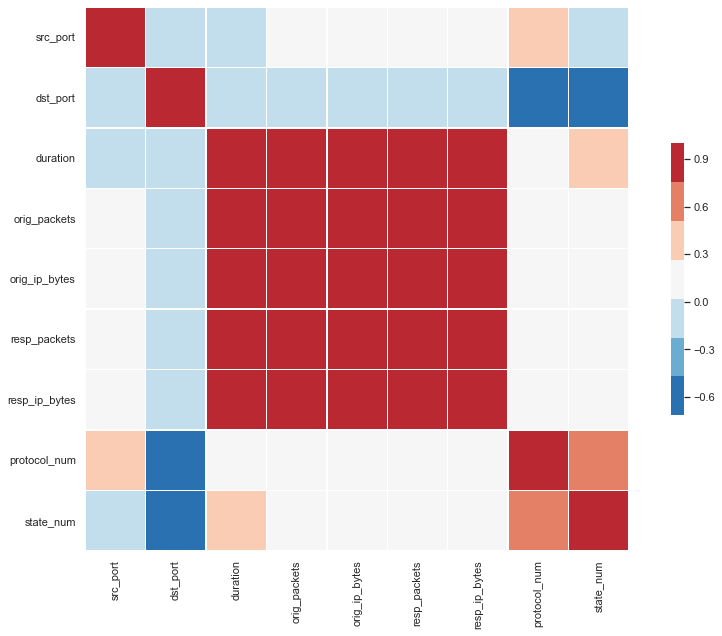

In [6]:
sns.set(style="white")
corr = soomfy_doorlock.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Remove outliers

In [7]:
continuous = ['src_port', 'dst_port', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num', 'state_num']
soomfy_doorlock_wo_outliers = soomfy_doorlock[(np.abs(stats.zscore(soomfy_doorlock[continuous])) < 3).all(axis=1)]
soomfy_doorlock_wo_outliers.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2520.150000,2357.941667,68.044188,9.733333,1641.666667,0.275000,64.716667,0.408333,0.933333
std,2586.352942,2630.451338,73.709396,10.114249,2090.611737,1.419921,432.446921,0.493586,1.043051
min,8.000000,0.000000,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.000000,67.000000,3.842401,5.750000,690.000000,0.000000,0.000000,0.000000,0.000000
50%,143.000000,136.000000,4.177373,6.000000,1164.000000,0.000000,0.000000,0.000000,0.000000
75%,5353.000000,5353.000000,135.423912,13.000000,1296.000000,0.000000,0.000000,1.000000,2.000000
max,5353.000000,5353.000000,180.863984,99.000000,9216.000000,13.000000,4264.000000,1.000000,3.000000


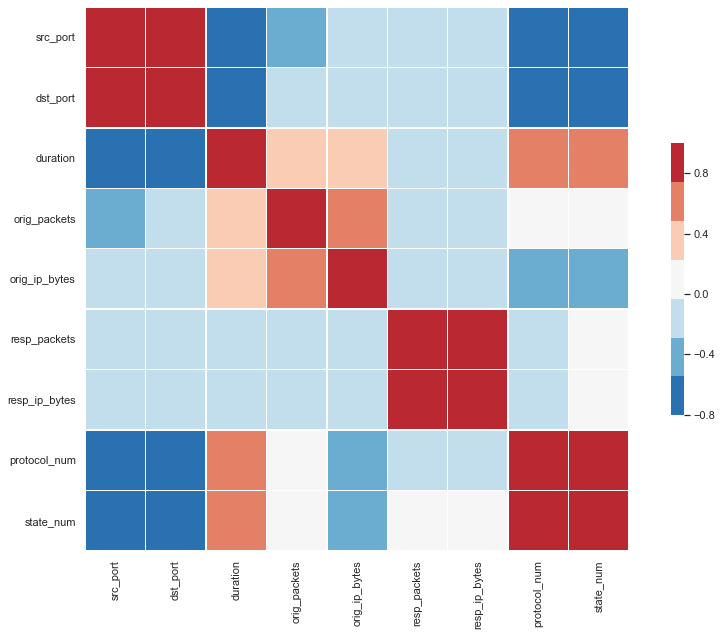

In [8]:
sns.set(style="white")
corr = soomfy_doorlock_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Host level analysis

### Duration and avg time difference between flows per host

In [9]:
soomfy_grouped_source_ip_time = soomfy_doorlock.groupby('src_ip').agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
soomfy_grouped_source_ip_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
soomfy_grouped_source_ip_time = soomfy_grouped_source_ip_time.sort_values(by=['count'], ascending=False).reset_index()
soomfy_grouped_source_ip_time

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,src_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,fe80::5bcc:698e:39d5:cdf,64,46.257080,4.075723,136.447958,1.789118,60.967462,00:01:16.896561,00:00:44.759795,00:05:45.284816,00:00:00.001288,00:01:59.047762
1,::,24,138.987199,135.343992,180.863984,0.000042,51.420478,00:03:28.717912,00:00:01.004053,00:07:59.976044,00:00:00.008691,00:03:53.584606
2,0.0.0.0,13,142.553187,171.633045,178.246691,9.399944,59.327898,00:06:51.081100,00:07:59.980089,00:08:00.069082,00:02:12.973026,00:02:14.406642
3,192.168.4.2,9,0.000008,0.000006,0.000015,0.000006,0.000004,00:01:11.649116,00:01:37.518750,00:01:37.718871,00:00:12.179059,00:00:37.201094
4,192.168.1.158,6,756.723079,0.429886,4537.403134,0.003738,1852.147575,00:12:12.110652,00:00:01.807467,01:00:56.684988,00:00:00.004745,00:27:14.887040
5,fe80::18:e207:b314:641b,6,0.000095,0.000094,0.000101,0.000089,0.000005,00:13:01.241708,00:02:55.463299,00:54:53.972381,00:02:10.597572,00:23:24.838167
6,fe80::211:32ff:fe8d:ffe2,2,0.000075,0.000075,0.000099,0.000052,0.000033,01:00:00.149129,01:00:00.149129,01:00:00.149129,01:00:00.149129,NaT
7,fe80::4eef:c0ff:fe27:561e,2,0.000095,0.000095,0.000114,0.000076,0.000027,01:00:00.091800,01:00:00.091800,01:00:00.091800,01:00:00.091800,NaT
8,fe80::6a05:71ff:fe67:dff2,2,6.508836,6.508836,13.017631,0.000041,9.204826,00:00:01.347730,00:00:01.347730,00:00:01.347730,00:00:01.347730,NaT
9,192.168.1.1,1,0.006710,0.006710,0.006710,0.006710,NaN,NaT,NaT,NaT,NaT,NaT


### Bytes and packets statistics per host

In [10]:
soomfy_grouped_source_ip_pb = soomfy_doorlock.groupby('src_ip').agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
soomfy_grouped_source_ip_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
soomfy_grouped_source_ip_pb = soomfy_grouped_source_ip_pb.sort_values(by=['count'], ascending=False).reset_index()
soomfy_grouped_source_ip_pb

,src_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,orig_bytes_max,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,fe80::5bcc:698e:39d5:cdf,64,7.203125,6.0,16,2,3.920559,1005.062500,1164,1296,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
1,::,24,8.666667,9.5,14,3,4.631336,786.000000,732,1384,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
2,0.0.0.0,13,21.076923,23.0,24,11,3.774068,7236.000000,7544,9216,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
3,192.168.4.2,9,0.000000,0.0,0,0,0.000000,0.000000,0,0,...,2.000000,2,2,2,0.000000,80.000000,80,80,80,0.000000
4,192.168.1.158,6,452.333333,3.0,2702,0,1102.108101,77857.666667,210,466302,...,525.833333,4,3137,2,1279.206069,179803.666667,567,1075416,152,438759.156641
5,fe80::18:e207:b314:641b,6,11.000000,11.0,11,11,0.000000,1206.333333,1089,1507,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
6,fe80::211:32ff:fe8d:ffe2,2,7.000000,7.0,7,7,0.000000,1652.000000,1652,1652,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
7,fe80::4eef:c0ff:fe27:561e,2,11.000000,11.0,11,11,0.000000,979.000000,979,979,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
8,fe80::6a05:71ff:fe67:dff2,2,54.500000,54.5,99,10,62.932504,3152.000000,3152,5544,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
9,192.168.1.1,1,2.000000,2.0,2,2,NaN,96.000000,96,96,...,2.000000,2,2,2,NaN,96.000000,96,96,96,NaN


### Destination IPs and ports, as well as protocol statistics per host

In [11]:
soomfy_grouped_source_ip_net = soomfy_doorlock.groupby('src_ip').agg({'dst_ip': ['count', 'nunique'], 'src_port': 'nunique', 'dst_port': 'nunique', 'protocol': 'nunique'})
soomfy_grouped_source_ip_net.columns = ['count', 'number of unique destination ips', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
soomfy_grouped_source_ip_net = soomfy_grouped_source_ip_net.sort_values(by=['count'], ascending=False).reset_index()
soomfy_grouped_source_ip_net

,src_ip,count,number of unique destination ips,number of unique source ports,number of unique destination ports,number of unique protocols
0,fe80::5bcc:698e:39d5:cdf,64,3,3,3,2
1,::,24,3,2,2,1
2,0.0.0.0,13,1,1,1,1
3,192.168.4.2,9,1,1,1,1
4,192.168.1.158,6,4,4,4,2
5,fe80::18:e207:b314:641b,6,1,1,1,1
6,fe80::211:32ff:fe8d:ffe2,2,1,1,1,1
7,fe80::4eef:c0ff:fe27:561e,2,1,1,1,1
8,fe80::6a05:71ff:fe67:dff2,2,2,2,2,1
9,192.168.1.1,1,1,1,1,1


### Now let's keep the host with the maximum number of flows

In [12]:
soomfy_doorlock_ip = soomfy_doorlock[soomfy_doorlock['src_ip'] == 'fe80::5bcc:698e:39d5:cdf'].reset_index(drop=True)
soomfy_doorlock_ip['orig_packets_per_s'] = soomfy_doorlock_ip['orig_packets'] / soomfy_doorlock_ip['duration']
soomfy_doorlock_ip['resp_packets_per_s'] = soomfy_doorlock_ip['resp_packets'] / soomfy_doorlock_ip['duration']
soomfy_doorlock_ip['orig_bytes_per_s'] = soomfy_doorlock_ip['orig_ip_bytes'] / soomfy_doorlock_ip['duration']
soomfy_doorlock_ip['resp_bytes_per_s'] = soomfy_doorlock_ip['resp_ip_bytes'] / soomfy_doorlock_ip['duration']
soomfy_doorlock_ip['packets_diff'] = soomfy_doorlock_ip['orig_packets'] - soomfy_doorlock_ip['resp_packets']
soomfy_doorlock_ip['bytes_diff'] = soomfy_doorlock_ip['orig_ip_bytes'] - soomfy_doorlock_ip['resp_ip_bytes']
soomfy_doorlock_ip['packets_per_s_diff'] = soomfy_doorlock_ip['orig_packets_per_s'] - soomfy_doorlock_ip['resp_packets_per_s']
soomfy_doorlock_ip['bytes_per_s_diff'] = soomfy_doorlock_ip['orig_bytes_per_s'] - soomfy_doorlock_ip['resp_bytes_per_s']
soomfy_doorlock_ip

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,orig_packets,orig_ip_bytes,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2019-07-03 13:19:13.772456884,fe80::5bcc:698e:39d5:cdf,143,ff02::16,0,icmp,135.487944,OTH,16,1296,...,1,2,0.118092,0.0,9.565427,0.0,16,1296,0.118092,9.565427
1,2019-07-03 13:19:13.917232990,fe80::5bcc:698e:39d5:cdf,133,ff02::2,134,icmp,135.000174,OTH,4,192,...,1,2,0.029630,0.0,1.422220,0.0,4,192,0.029630,1.422220
2,2019-07-03 13:19:13.959669113,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.948539,S0,6,1164,...,0,0,1.519549,0.0,294.792580,0.0,6,1164,1.519549,294.792580
3,2019-07-03 13:19:58.302953959,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.768179,S0,6,1164,...,0,0,1.592281,0.0,308.902523,0.0,6,1164,1.592281,308.902523
4,2019-07-03 13:20:43.994678020,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.756296,S0,6,1164,...,0,0,1.597318,0.0,309.879733,0.0,6,1164,1.597318,309.879733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019-07-03 14:33:29.141279936,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.934943,S0,6,1164,...,0,0,1.524800,0.0,295.811146,0.0,6,1164,1.524800,295.811146
60,2019-07-03 14:39:13.612461090,fe80::5bcc:698e:39d5:cdf,143,ff02::16,0,icmp,45.215915,OTH,8,648,...,1,2,0.176929,0.0,14.331237,0.0,8,648,0.176929,14.331237
61,2019-07-03 14:39:13.909987926,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,4.192472,S0,6,1164,...,0,0,1.431137,0.0,277.640495,0.0,6,1164,1.431137,277.640495
62,2019-07-03 14:39:13.917407036,fe80::5bcc:698e:39d5:cdf,133,ff02::2,134,icmp,44.242223,OTH,2,96,...,1,2,0.045206,0.0,2.169873,0.0,2,96,0.045206,2.169873


In [13]:
# As we can see there are no received packets and bytes, meaning that the metrics including these values are meaningless
soomfy_doorlock_ip.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.0,64.000000,64.000000,64.000000,64.0,64.000000,64.0,64.000000,64.000000,64.000000,64.000000
mean,3560.343750,3535.937500,46.257080,7.203125,1005.062500,0.0,0.0,0.343750,0.687500,1.044561,0.0,199.523834,0.0,7.203125,1005.062500,1.044561,199.523834
std,2496.492932,2530.789568,60.967462,3.920559,387.248982,0.0,0.0,0.478714,0.957427,0.725108,0.0,145.021380,0.0,3.920559,387.248982,0.725108,145.021380
min,133.000000,0.000000,1.789118,2.000000,96.000000,0.0,0.0,0.000000,0.000000,0.029440,0.0,1.413126,0.0,2.000000,96.000000,0.029440,1.413126
25%,143.000000,134.000000,3.875960,6.000000,1164.000000,0.0,0.0,0.000000,0.000000,0.118071,0.0,9.563734,0.0,6.000000,1164.000000,0.118071,9.563734
50%,5353.000000,5353.000000,4.075723,6.000000,1164.000000,0.0,0.0,0.000000,0.000000,1.472132,0.0,285.593515,0.0,6.000000,1164.000000,1.472132,285.593515
75%,5353.000000,5353.000000,134.935442,6.000000,1164.000000,0.0,0.0,1.000000,2.000000,1.548004,0.0,300.312717,0.0,6.000000,1164.000000,1.548004,300.312717
max,5353.000000,5353.000000,136.447958,16.000000,1296.000000,0.0,0.0,1.000000,2.000000,2.794673,0.0,545.520195,0.0,16.000000,1296.000000,2.794673,545.520195


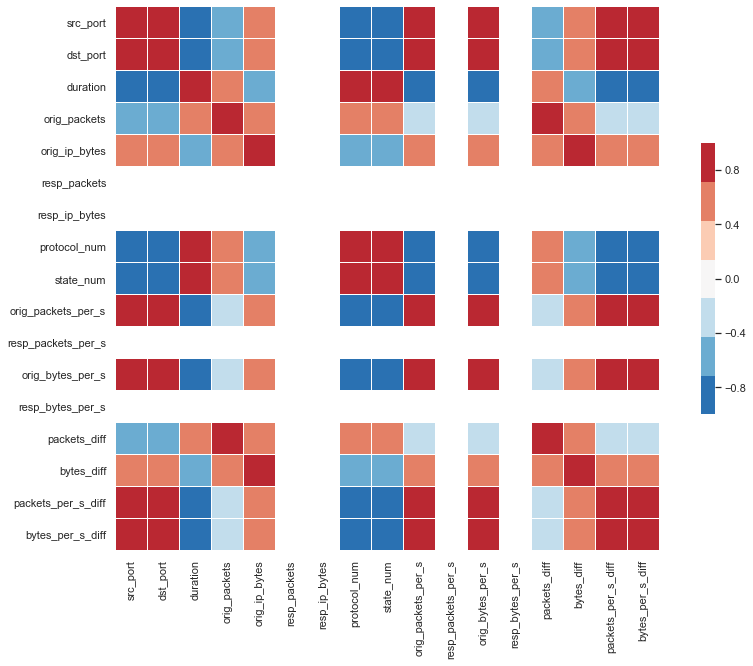

In [14]:
sns.set(style="white")
corr = soomfy_doorlock_ip.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Remove outliers

In [16]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'orig_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
soomfy_doorlock_ip_wo_outliers = soomfy_doorlock_ip[(np.abs(stats.zscore(soomfy_doorlock_ip[continuous])) < 3).all(axis=1)]
soomfy_doorlock_ip_wo_outliers.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.0,64.000000,64.000000,64.000000,64.0,64.000000,64.0,64.000000,64.000000,64.000000,64.000000
mean,3560.343750,3535.937500,46.257080,7.203125,1005.062500,0.0,0.0,0.343750,0.687500,1.044561,0.0,199.523834,0.0,7.203125,1005.062500,1.044561,199.523834
std,2496.492932,2530.789568,60.967462,3.920559,387.248982,0.0,0.0,0.478714,0.957427,0.725108,0.0,145.021380,0.0,3.920559,387.248982,0.725108,145.021380
min,133.000000,0.000000,1.789118,2.000000,96.000000,0.0,0.0,0.000000,0.000000,0.029440,0.0,1.413126,0.0,2.000000,96.000000,0.029440,1.413126
25%,143.000000,134.000000,3.875960,6.000000,1164.000000,0.0,0.0,0.000000,0.000000,0.118071,0.0,9.563734,0.0,6.000000,1164.000000,0.118071,9.563734
50%,5353.000000,5353.000000,4.075723,6.000000,1164.000000,0.0,0.0,0.000000,0.000000,1.472132,0.0,285.593515,0.0,6.000000,1164.000000,1.472132,285.593515
75%,5353.000000,5353.000000,134.935442,6.000000,1164.000000,0.0,0.0,1.000000,2.000000,1.548004,0.0,300.312717,0.0,6.000000,1164.000000,1.548004,300.312717
max,5353.000000,5353.000000,136.447958,16.000000,1296.000000,0.0,0.0,1.000000,2.000000,2.794673,0.0,545.520195,0.0,16.000000,1296.000000,2.794673,545.520195


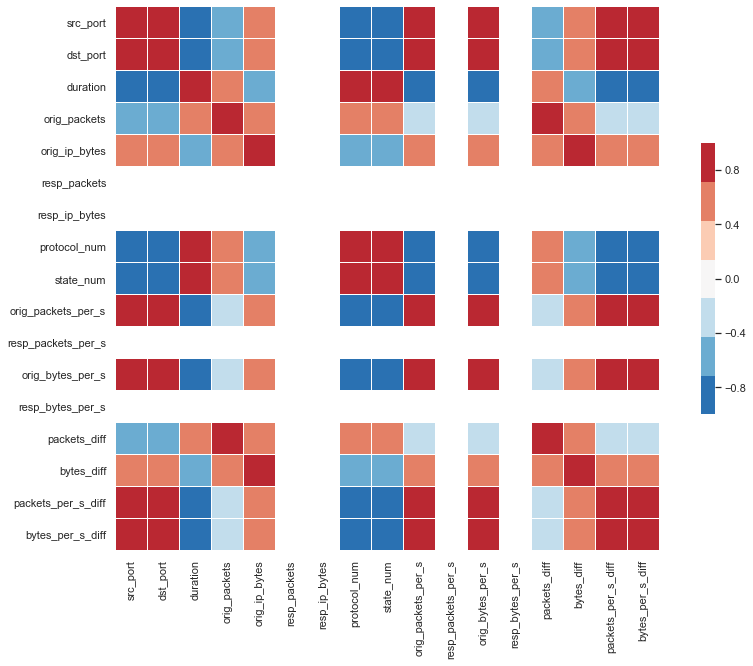

In [17]:
sns.set(style="white")
corr = soomfy_doorlock_ip_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

#### Since there are no outliers in this dataset only one plot per feature category is included

### Duration against time

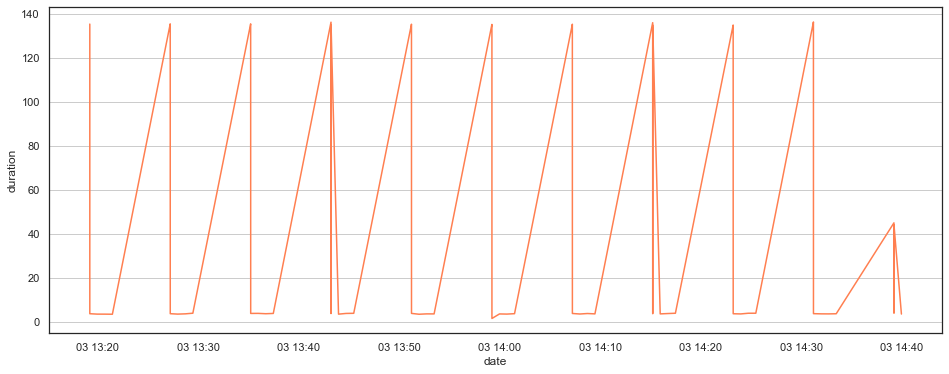

In [18]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=soomfy_doorlock_ip, color="coral")
plt.grid(axis='y')

### Number of originator's bytes against time

Text(0, 0.5, 'Number of bytes')

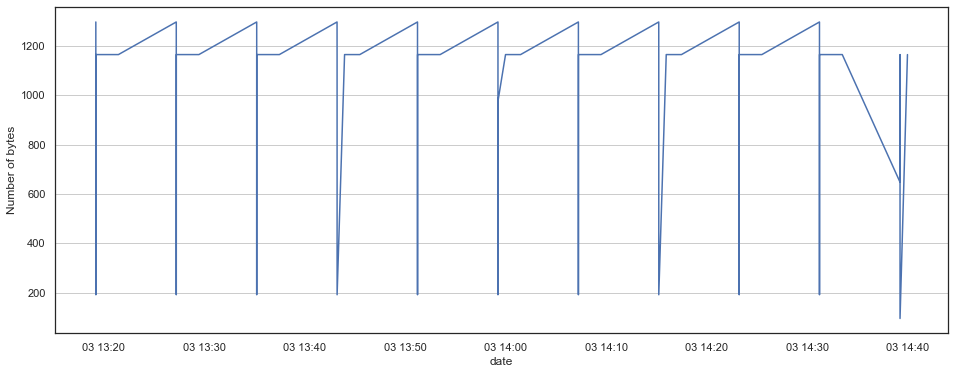

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=soomfy_doorlock_ip)
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of originator's packets against time

Text(0, 0.5, 'Number of packets')

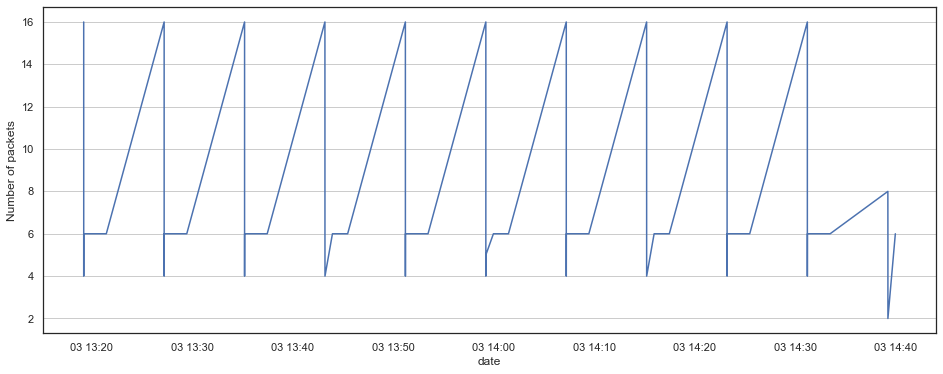

In [20]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=soomfy_doorlock_ip)
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's bytes/sec and packets/sec

Text(0, 0.5, 'Originating Bytes / sec')

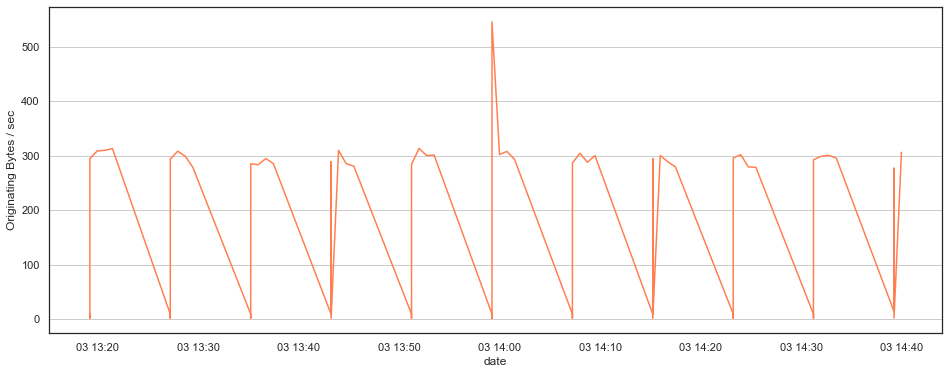

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=soomfy_doorlock_ip, color='coral')
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

Text(0, 0.5, 'Originating Packets / sec')

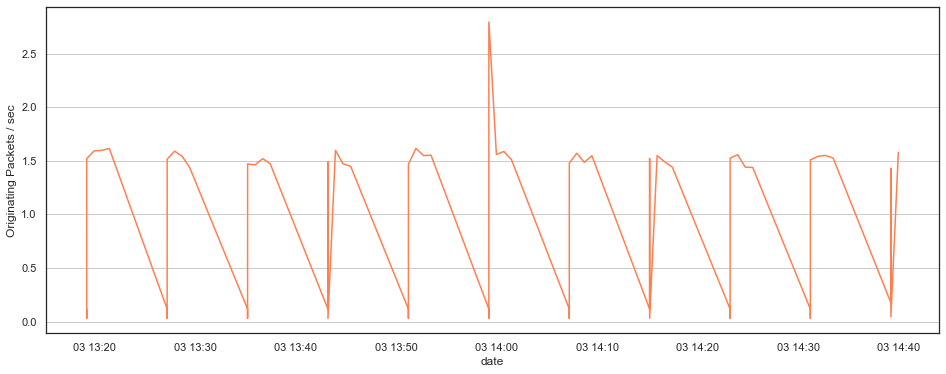

In [22]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=soomfy_doorlock_ip, color='coral')
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

### Protocol type distribution

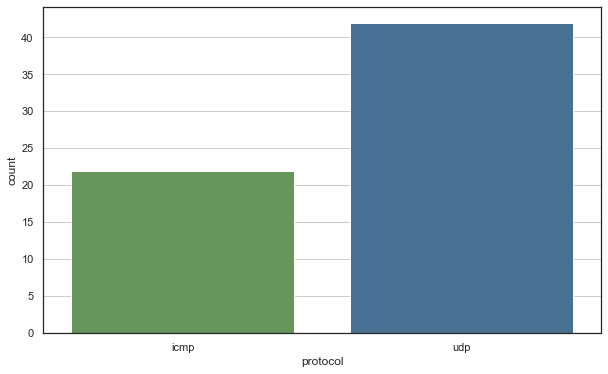

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=soomfy_doorlock_ip, palette=[sns.xkcd_rgb["muted green"], sns.xkcd_rgb["muted blue"]])
plt.grid(axis='y')

### Packets sent per protocol

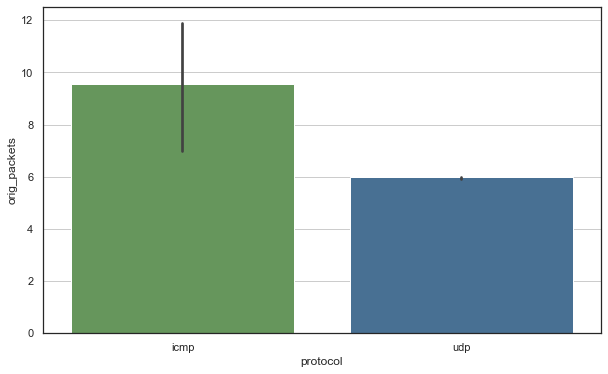

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=soomfy_doorlock_ip, palette=[sns.xkcd_rgb["muted green"], sns.xkcd_rgb["muted blue"]])
plt.grid(axis='y')

### Bytes sent per protocol

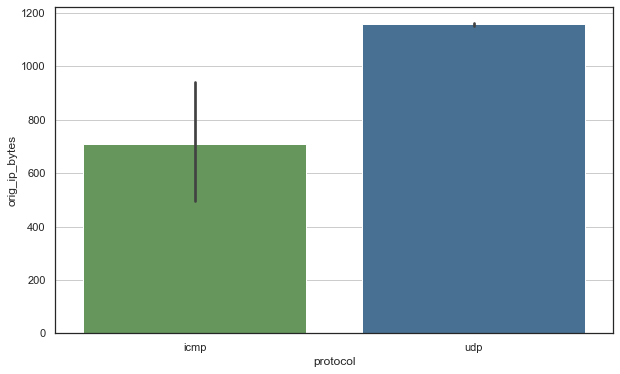

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=soomfy_doorlock_ip, palette=[sns.xkcd_rgb["muted green"], sns.xkcd_rgb["muted blue"]])
plt.grid(axis='y')

### Duration per protocol

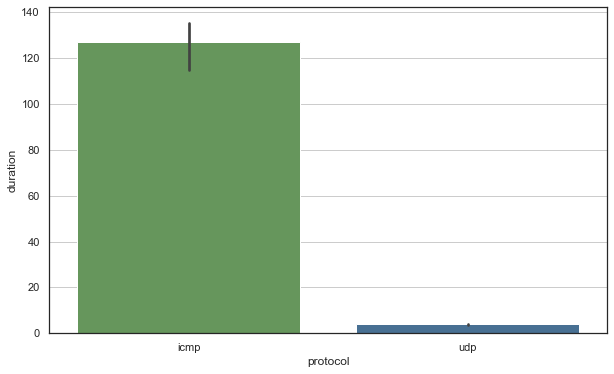

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=soomfy_doorlock_ip, palette=[sns.xkcd_rgb["muted green"], sns.xkcd_rgb["muted blue"]])
plt.grid(axis='y')

## Connection level analysis

### Duration and avg time difference between flows per connection

In [27]:
soomfy_grouped_connection_time = soomfy_doorlock.groupby(['src_ip', 'dst_ip']).agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
soomfy_grouped_connection_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
soomfy_grouped_connection_time = soomfy_grouped_connection_time.sort_values(by=['count'], ascending=False).reset_index()
soomfy_grouped_connection_time

,src_ip,dst_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,fe80::5bcc:698e:39d5:cdf,ff02::fb,42,3.898292,3.938759,4.192472,1.789118,0.361199,00:01:58.153564,00:00:45.055307,00:05:45.465842,00:00:44.137884,00:02:10.414495
1,0.0.0.0,255.255.255.255,13,142.553187,171.633045,178.246691,9.399944,59.327898,00:06:51.081100,00:07:59.980089,00:08:00.069082,00:02:12.973026,00:02:14.406642
2,::,ff02::16,12,157.959657,180.403994,180.863984,0.000042,56.086132,00:07:16.363640,00:07:59.979983,00:08:00.076018,00:02:20.032284,00:01:46.884411
3,fe80::5bcc:698e:39d5:cdf,ff02::2,11,126.790324,134.983429,135.868948,44.242223,27.379583,00:08:00.000017,00:08:00.040263,00:08:00.812581,00:07:59.107074,00:00:00.413733
4,fe80::5bcc:698e:39d5:cdf,ff02::16,11,127.457393,135.487944,136.447958,45.215915,27.279972,00:07:59.984000,00:08:00.128022,00:08:00.512018,00:07:59.103979,00:00:00.437283
5,::,ff02::1:ffd5:cdf,11,130.925168,134.848031,135.856688,89.824030,13.636257,00:07:59.984000,00:08:00.128030,00:08:00.496692,00:07:59.119317,00:00:00.431820
6,192.168.4.2,192.168.4.1,9,0.000008,0.000006,0.000015,0.000006,0.000004,00:01:11.649116,00:01:37.518750,00:01:37.718871,00:00:12.179059,00:00:37.201094
7,fe80::18:e207:b314:641b,ff02::fb,6,0.000095,0.000094,0.000101,0.000089,0.000005,00:13:01.241708,00:02:55.463299,00:54:53.972381,00:02:10.597572,00:23:24.838167
8,192.168.1.158,192.168.1.1,3,0.961868,0.829530,2.052335,0.003738,1.030690,00:30:30.273766,00:30:30.273766,01:00:58.740065,00:00:01.807467,00:43:05.841837
9,fe80::211:32ff:fe8d:ffe2,ff02::fb,2,0.000075,0.000075,0.000099,0.000052,0.000033,01:00:00.149129,01:00:00.149129,01:00:00.149129,01:00:00.149129,NaT


### Packets and bytes statistics per connection

In [28]:
soomfy_grouped_connection_pb = soomfy_doorlock.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
soomfy_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
soomfy_grouped_connection_pb = soomfy_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
soomfy_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,fe80::5bcc:698e:39d5:cdf,ff02::fb,42,5.976190,6,6,5,0.154303,1159.523810,1164,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
1,0.0.0.0,255.255.255.255,13,21.076923,23,24,11,3.774068,7236.000000,7544,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
2,::,ff02::16,12,12.833333,13,14,9,1.642245,1255.333333,1308,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
3,fe80::5bcc:698e:39d5:cdf,ff02::2,11,3.818182,4,4,2,0.603023,183.272727,192,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
4,fe80::5bcc:698e:39d5:cdf,ff02::16,11,15.272727,16,16,8,2.412091,1237.090909,1296,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
5,::,ff02::1:ffd5:cdf,11,3.909091,4,4,3,0.301511,281.454545,288,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
6,192.168.4.2,192.168.4.1,9,0.000000,0,0,0,0.000000,0.000000,0,...,2.000000,2,2,2,0.000000,80,80,80,80,0.000000
7,fe80::18:e207:b314:641b,ff02::fb,6,11.000000,11,11,11,0.000000,1206.333333,1089,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000
8,192.168.1.158,192.168.1.1,3,2.666667,4,4,0,2.309401,180.000000,268,...,4.666667,4,6,4,1.154701,1034,610,1968,524,810.009876
9,fe80::211:32ff:fe8d:ffe2,ff02::fb,2,7.000000,7,7,7,0.000000,1652.000000,1652,...,0.000000,0,0,0,0.000000,0,0,0,0,0.000000


### Source and destination ports, as well as protocol statistics per connection

In [29]:
soomfy_grouped_connection_net = soomfy_doorlock.groupby(['src_ip', 'dst_ip']).agg({'src_port': ['count', 'nunique'], 'dst_port': 'nunique', 'protocol': 'nunique'})
soomfy_grouped_connection_net.columns = ['count', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
soomfy_grouped_connection_net = soomfy_grouped_connection_net.sort_values(by=['count'], ascending=False).reset_index()
soomfy_grouped_connection_net

,src_ip,dst_ip,count,number of unique source ports,number of unique destination ports,number of unique protocols
0,fe80::5bcc:698e:39d5:cdf,ff02::fb,42,1,1,1
1,0.0.0.0,255.255.255.255,13,1,1,1
2,::,ff02::16,12,1,1,1
3,fe80::5bcc:698e:39d5:cdf,ff02::2,11,1,1,1
4,fe80::5bcc:698e:39d5:cdf,ff02::16,11,1,1,1
5,::,ff02::1:ffd5:cdf,11,1,1,1
6,192.168.4.2,192.168.4.1,9,1,1,1
7,fe80::18:e207:b314:641b,ff02::fb,6,1,1,1
8,192.168.1.158,192.168.1.1,3,2,2,1
9,fe80::211:32ff:fe8d:ffe2,ff02::fb,2,1,1,1


### Now let's keep the IP pair with the highest number of flows

In [30]:
soomfy_doorlock_conn = soomfy_doorlock.loc[(soomfy_doorlock['src_ip'] == 'fe80::5bcc:698e:39d5:cdf') & (soomfy_doorlock['dst_ip'] == 'ff02::fb')].reset_index(drop=True)
soomfy_doorlock_conn['orig_packets_per_s'] = soomfy_doorlock_conn['orig_packets'] / soomfy_doorlock_conn['duration']
soomfy_doorlock_conn['resp_packets_per_s'] = soomfy_doorlock_conn['resp_packets'] / soomfy_doorlock_conn['duration']
soomfy_doorlock_conn['orig_bytes_per_s'] = soomfy_doorlock_conn['orig_ip_bytes'] / soomfy_doorlock_conn['duration']
soomfy_doorlock_conn['resp_bytes_per_s'] = soomfy_doorlock_conn['resp_ip_bytes'] / soomfy_doorlock_conn['duration']
soomfy_doorlock_conn['packets_diff'] = soomfy_doorlock_conn['orig_packets'] - soomfy_doorlock_conn['resp_packets']
soomfy_doorlock_conn['bytes_diff'] = soomfy_doorlock_conn['orig_ip_bytes'] - soomfy_doorlock_conn['resp_ip_bytes']
soomfy_doorlock_conn['packets_per_s_diff'] = soomfy_doorlock_conn['orig_packets_per_s'] - soomfy_doorlock_conn['resp_packets_per_s']
soomfy_doorlock_conn['bytes_per_s_diff'] = soomfy_doorlock_conn['orig_bytes_per_s'] - soomfy_doorlock_conn['resp_bytes_per_s']
soomfy_doorlock_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,orig_packets,orig_ip_bytes,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2019-07-03 13:19:13.959669113,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.948539,S0,6,1164,...,0,0,1.519549,0.0,294.792580,0.0,6,1164,1.519549,294.792580
1,2019-07-03 13:19:58.302953959,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.768179,S0,6,1164,...,0,0,1.592281,0.0,308.902523,0.0,6,1164,1.592281,308.902523
2,2019-07-03 13:20:43.994678020,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.756296,S0,6,1164,...,0,0,1.597318,0.0,309.879733,0.0,6,1164,1.597318,309.879733
3,2019-07-03 13:21:28.647638083,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.715573,S0,6,1164,...,0,0,1.614825,0.0,313.276041,0.0,6,1164,1.614825,313.276041
4,2019-07-03 13:27:14.113480091,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.959121,S0,6,1164,...,0,0,1.515488,0.0,294.004654,0.0,6,1164,1.515488,294.004654
5,2019-07-03 13:27:58.691570044,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.774344,S0,6,1164,...,0,0,1.589680,0.0,308.397963,0.0,6,1164,1.589680,308.397963
6,2019-07-03 13:28:43.967175007,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,3.893012,S0,6,1164,...,0,0,1.541223,0.0,298.997280,0.0,6,1164,1.541223,298.997280
7,2019-07-03 13:29:28.942820072,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,4.180049,S0,6,1164,...,0,0,1.435390,0.0,278.465635,0.0,6,1164,1.435390,278.465635
8,2019-07-03 13:35:14.237229109,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,4.080298,S0,6,1164,...,0,0,1.470481,0.0,285.273282,0.0,6,1164,1.470481,285.273282
9,2019-07-03 13:35:58.375113964,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,4.104848,S0,6,1164,...,0,0,1.461686,0.0,283.567138,0.0,6,1164,1.461686,283.567138


In [31]:
# As we can see there are no received packets and bytes, meaning that the metrics including these values are meaningless
soomfy_doorlock_conn.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,42.0,42.0,42.000000,42.000000,42.00000,42.0,42.0,42.0,42.0,42.000000,42.0,42.000000,42.0,42.000000,42.00000,42.000000,42.000000
mean,5353.0,5353.0,3.898292,5.976190,1159.52381,0.0,0.0,0.0,0.0,1.551293,0.0,301.030665,0.0,5.976190,1159.52381,1.551293,301.030665
std,0.0,0.0,0.361199,0.154303,29.00903,0.0,0.0,0.0,0.0,0.203658,0.0,40.009212,0.0,0.154303,29.00903,0.203658,40.009212
min,5353.0,5353.0,1.789118,5.000000,976.00000,0.0,0.0,0.0,0.0,1.431137,0.0,277.640495,0.0,5.000000,976.00000,1.431137,277.640495
25%,5353.0,5353.0,3.851014,6.000000,1164.00000,0.0,0.0,0.0,0.0,1.473904,0.0,285.937334,0.0,6.000000,1164.00000,1.473904,285.937334
50%,5353.0,5353.0,3.938759,6.000000,1164.00000,0.0,0.0,0.0,0.0,1.523324,0.0,295.524832,0.0,6.000000,1164.00000,1.523324,295.524832
75%,5353.0,5353.0,4.070834,6.000000,1164.00000,0.0,0.0,0.0,0.0,1.558032,0.0,302.258123,0.0,6.000000,1164.00000,1.558032,302.258123
max,5353.0,5353.0,4.192472,6.000000,1164.00000,0.0,0.0,0.0,0.0,2.794673,0.0,545.520195,0.0,6.000000,1164.00000,2.794673,545.520195


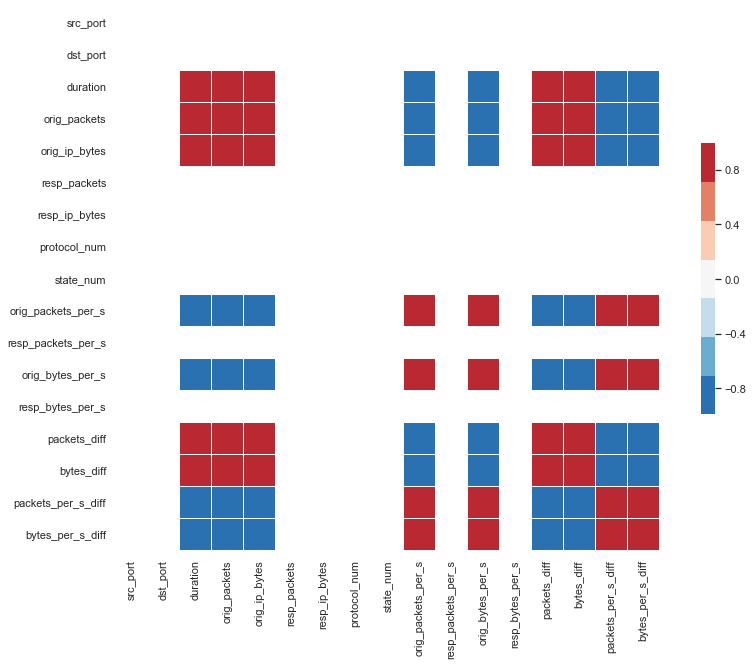

In [32]:
sns.set(style="white")
corr = soomfy_doorlock_conn.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Remove the outliers

In [34]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'orig_packets_per_s', 'orig_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
soomfy_doorlock_conn_wo_outliers = soomfy_doorlock_conn[(np.abs(stats.zscore(soomfy_doorlock_conn[continuous])) < 3).all(axis=1)]
soomfy_doorlock_conn_wo_outliers.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,41.0,41.0,41.000000,41.0,41.0,41.0,41.0,41.0,41.0,41.000000,41.0,41.000000,41.0,41.0,41.0,41.000000,41.000000
mean,5353.0,5353.0,3.949735,6.0,1164.0,0.0,0.0,0.0,0.0,1.520967,0.0,295.067506,0.0,6.0,1164.0,1.520967,295.067506
std,0.0,0.0,0.140706,0.0,0.0,0.0,0.0,0.0,0.0,0.054045,0.0,10.484703,0.0,0.0,0.0,0.054045,10.484703
min,5353.0,5353.0,3.712268,6.0,1164.0,0.0,0.0,0.0,0.0,1.431137,0.0,277.640495,0.0,6.0,1164.0,1.431137,277.640495
25%,5353.0,5353.0,3.854194,6.0,1164.0,0.0,0.0,0.0,0.0,1.472459,0.0,285.657070,0.0,6.0,1164.0,1.472459,285.657070
50%,5353.0,5353.0,3.942575,6.0,1164.0,0.0,0.0,0.0,0.0,1.521848,0.0,295.238518,0.0,6.0,1164.0,1.521848,295.238518
75%,5353.0,5353.0,4.074816,6.0,1164.0,0.0,0.0,0.0,0.0,1.556746,0.0,302.008669,0.0,6.0,1164.0,1.556746,302.008669
max,5353.0,5353.0,4.192472,6.0,1164.0,0.0,0.0,0.0,0.0,1.616263,0.0,313.554948,0.0,6.0,1164.0,1.616263,313.554948


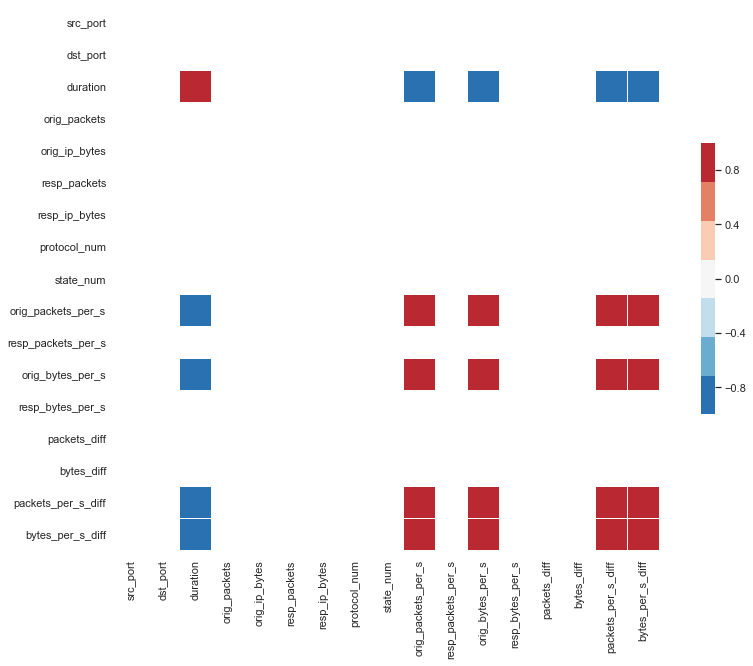

In [35]:
sns.set(style="white")
corr = soomfy_doorlock_conn_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Duration against time

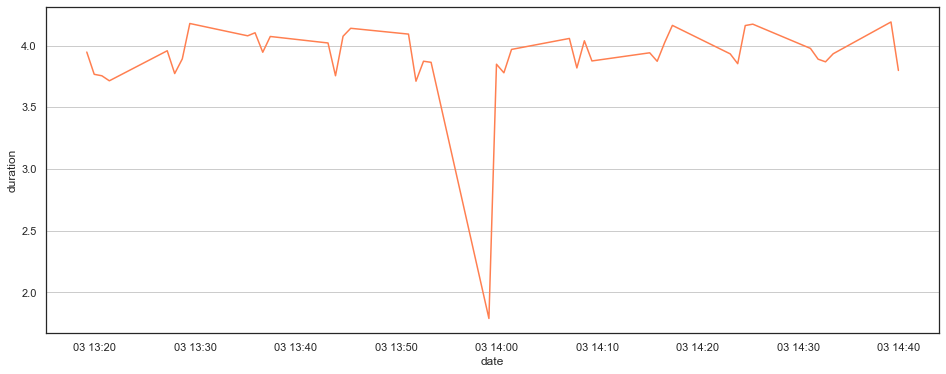

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=soomfy_doorlock_conn, color="coral")
plt.grid(axis='y')

#### Without outlier

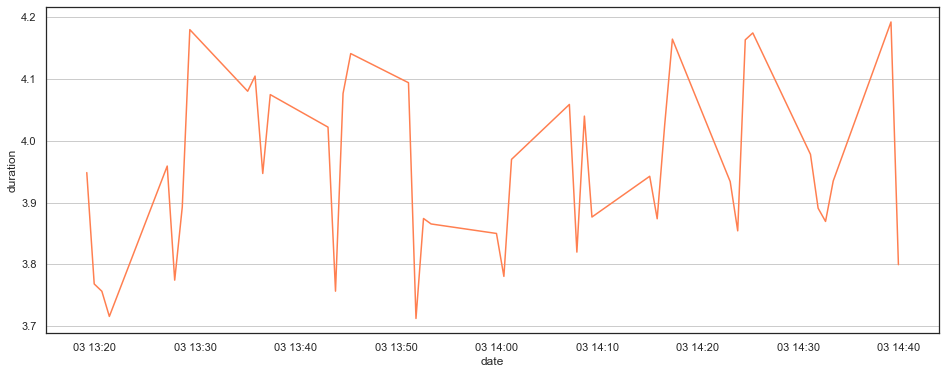

In [37]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=soomfy_doorlock_conn_wo_outliers, color="coral")
plt.grid(axis='y')

### Number of originator's bytes against time

Text(0, 0.5, 'Number of bytes')

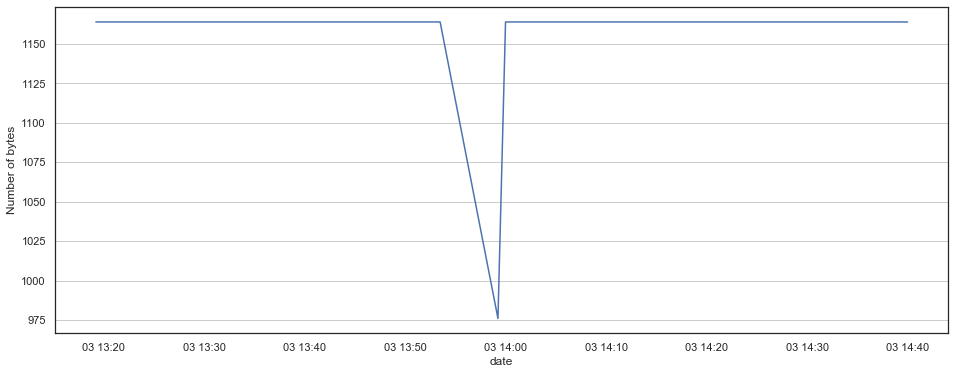

In [38]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=soomfy_doorlock_conn)
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### Without outlier

Text(0, 0.5, 'Number of bytes')

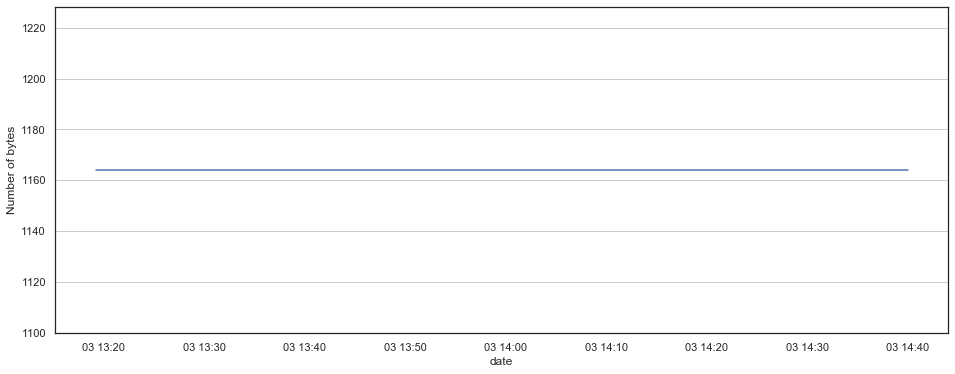

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=soomfy_doorlock_conn_wo_outliers)
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of originator's packets against time

Text(0, 0.5, 'Number of packets')

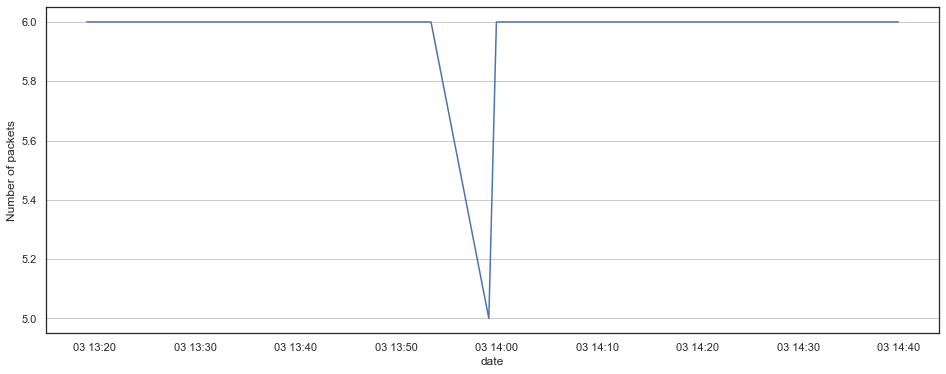

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=soomfy_doorlock_conn)
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### Without outlier

Text(0, 0.5, 'Number of packets')

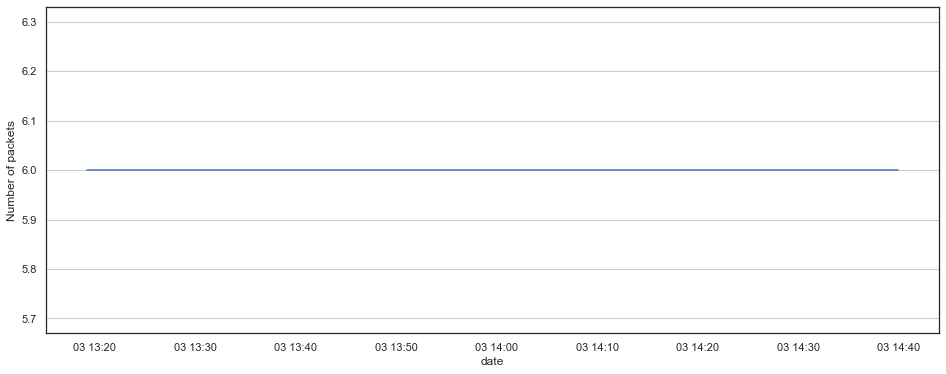

In [42]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=soomfy_doorlock_conn_wo_outliers)
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's bytes/sec and packets/sec against time

Text(0, 0.5, 'Originating Bytes / sec')

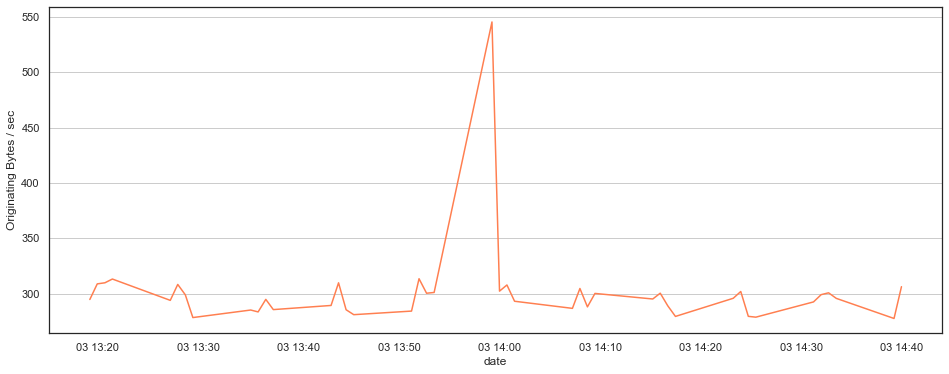

In [43]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=soomfy_doorlock_conn, color='coral')
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

Text(0, 0.5, 'Originating Packets / sec')

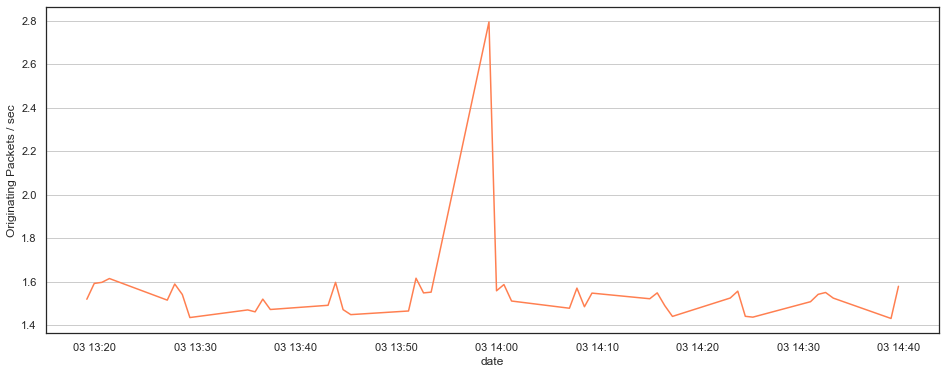

In [44]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=soomfy_doorlock_conn, color='coral')
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

#### Without outlier

Text(0, 0.5, 'Originating Bytes / sec')

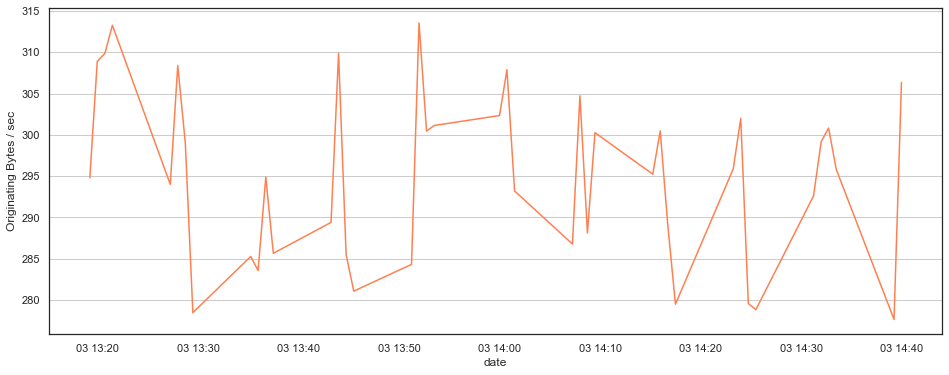

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=soomfy_doorlock_conn_wo_outliers, color='coral')
plt.grid(axis='y')
plt.ylabel("Originating Bytes / sec")

Text(0, 0.5, 'Originating Packets / sec')

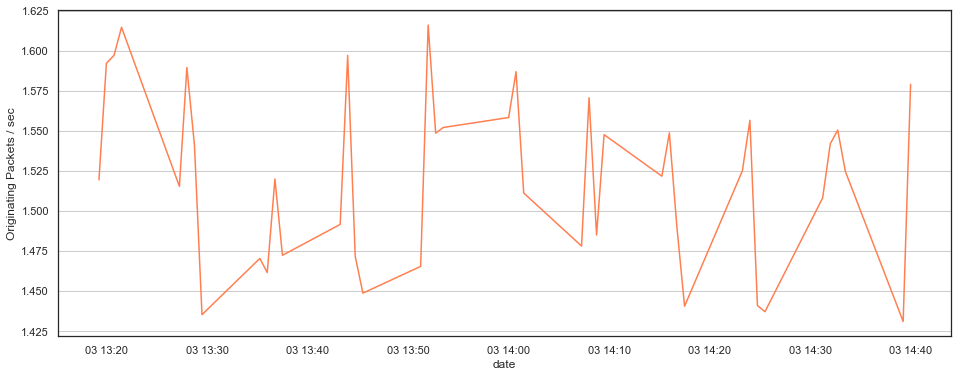

In [46]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=soomfy_doorlock_conn_wo_outliers, color='coral')
plt.grid(axis='y')
plt.ylabel("Originating Packets / sec")

### Protocol distribution

In [47]:
# since there is only one protocol in this dataset there is no point of further visualization
soomfy_doorlock_conn['protocol'].nunique()

1